In [1]:
from matplotlib import pyplot as plt
import torch

from DataSetLoaders import ChessRec_Dataset

import sys
sys.path.append('BoardDetector_Yolo')
import ChessLens

from Utils import ChessUtils

In [2]:
dataset = ChessRec_Dataset.ChessRecDataset(label_key="fen")
dataloader = dataset.getLoader(1)

In [3]:
img = ChessLens.ChessLensImage()
CU = ChessUtils.ChessTensorUtils()

In [4]:
def compare_matricies(m1, m2):
    return (m1 != m2).sum().item()


0: 640x640 1 chessboard, 62.4ms
Speed: 16.3ms preprocess, 62.4ms inference, 16.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 black-bishops, 3 black-knights, 6 black-pawns, 2 black-queens, 1 black-rook, 3 white-kings, 1 white-knight, 7 white-pawns, 2 white-rooks, 111.4ms
Speed: 12.4ms preprocess, 111.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Error: 33
Opening in existing browser session.


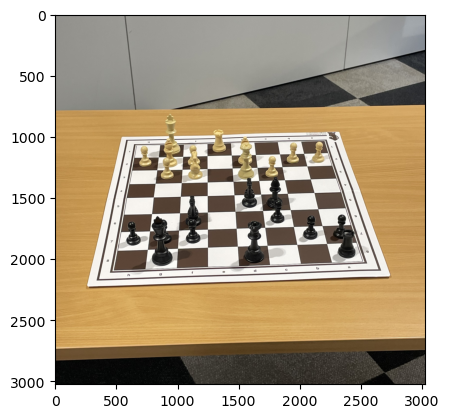

In [10]:
for X, fen in dataloader:
    X = X[0].permute(1, 2, 0)
    fen = fen[0]

    if (X.max() <= 1):
        X = X * 255
        X = X.to(torch.uint8)

    img.load_image(X)
    img.detect_board()
    img.recognize_pieces()

    matrix = CU.onehot_to_int(CU.FENtoTensor(fen))
    print(f"Error: {compare_matricies(img.piece_matrix, matrix)}")

    plt.imshow(X);

    break

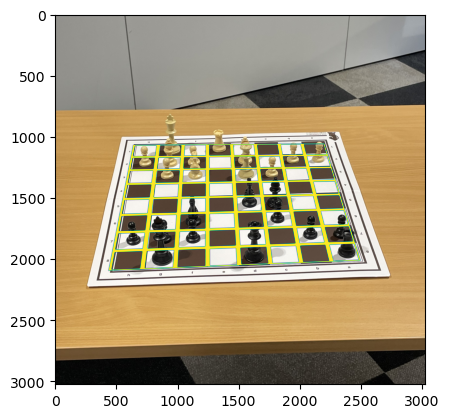

In [11]:
img.preview_board()

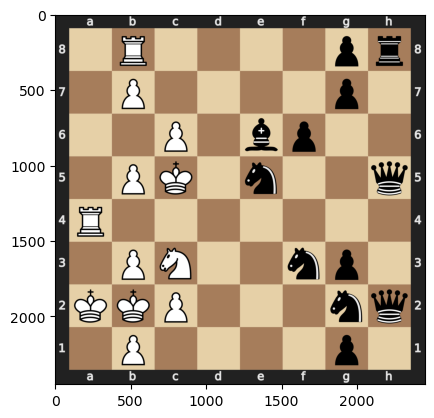

In [12]:
img.save_fen_image()
plt.imshow(plt.imread("out_fen.png"));